# Project Name : Pizza Price Prediction

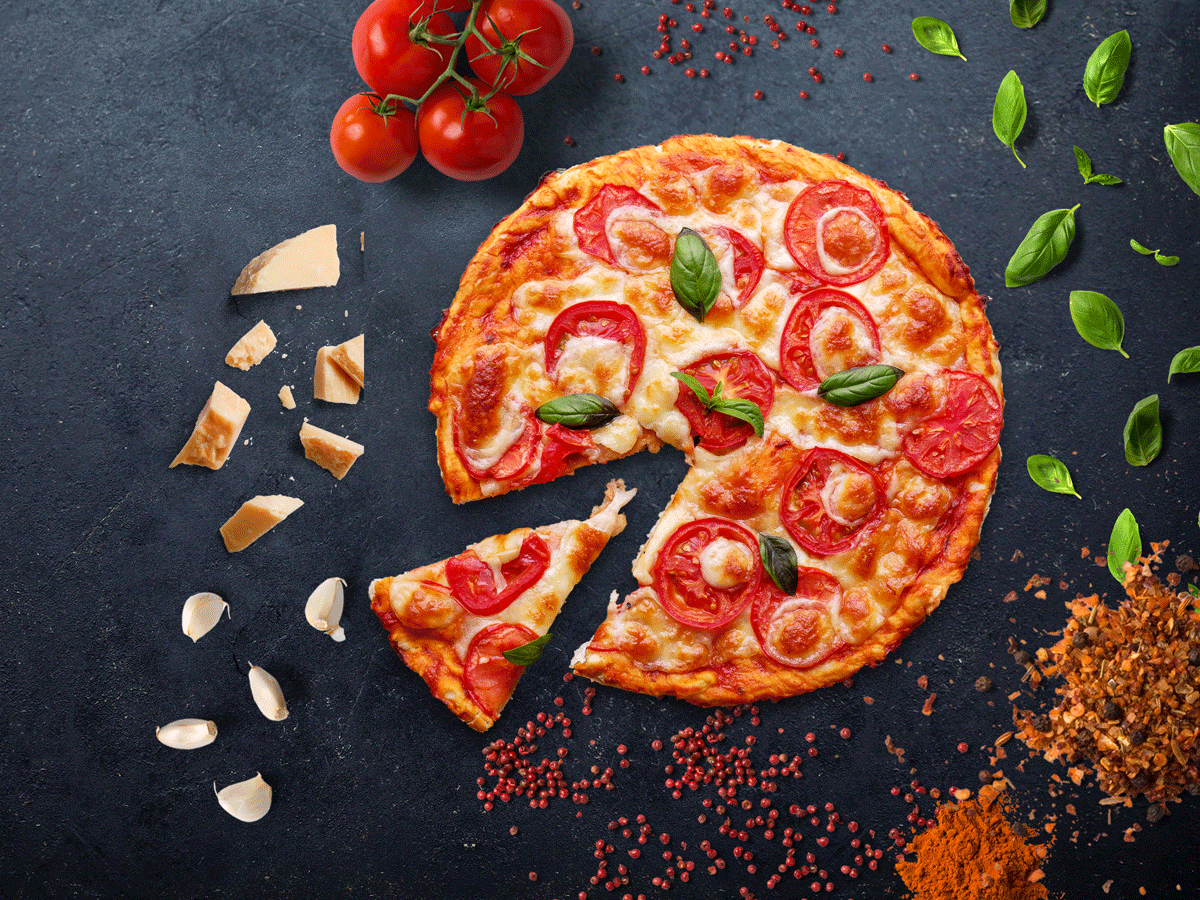

## Context
### The dataset given is for predicting the prices of pizza, the dataset is not complete at all, but you can use this dataset for learning or study or maybe you want to upgrade the data by yourself, is okay for me, hopefully, this dataset is useful for you guys, and use this dataset wisely.

### In this project we will be building a model which will predict the prices of data based on different parameters such as number of toppings, diameter, etc.

#### We will use different Machine Learning Models and then we will see how we can do all of this with the help of Auto Machine Learning. We will be using Eval ML Library for this project

### Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis
- Feature Engineering
- Model building using ML models
- Model building and prediction using Auto ML

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading the DataSet

In [ ]:
df= pd.read_csv("pizza_v2.csv")

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
# Renaming the price column
df.rename({'price_rupiah':'price'}, axis=1, inplace=True)

# Extracting digits in price column and converting to integer
df.price = df.price.str.replace('Rp','').str.replace(',','').astype(int)

# Extracting digits in diameter and converting to integer
df['diameter'] = df['diameter'].str.extract('(\d+\.?\d*)').astype(float) 

In [ ]:
df.head()

### Data Analysis

In [ ]:
import plotly.express as px
plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),autopct='%.1f', labels= df['company'].unique())
plt.title('Companies Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['diameter'].value_counts(),autopct='%.1f', labels= df['diameter'].unique())
plt.title('diameter Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['topping'].value_counts(),autopct='%.1f', labels= df['topping'].unique())
plt.title('topping Weigtage')
plt.show()

plt.figure(figsize=(7,7))
plt.pie(df['variant'].value_counts(),autopct='%.1f', labels= df['variant'].unique())
plt.title('variant Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['size'].value_counts(),autopct='%.1f', labels= df['size'].unique())
plt.title('size Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_sauce'].value_counts(),autopct='%.1f', labels= df['extra_sauce'].unique())
plt.title('extra_sauce Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_cheese'].value_counts(),autopct='%.1f', labels= df['extra_cheese'].unique())
plt.title('extra_cheese Weigtage')
plt.show()

In [ ]:
sns.histplot(data=df, x="company",hue='extra_sauce')

In [ ]:
df_company=df.groupby('company').agg({'company':['count']})
sns.kdeplot(df['company'].value_counts(), color='g', shade=True)

In [ ]:
df_company=df.groupby('topping').agg({'topping':['count']})
sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)

In [ ]:
sns.histplot(data=df, x="company",hue='extra_cheese')

In [ ]:
sns.histplot(data=df, x="company",hue='extra_sauce')

In [ ]:
sns.histplot(data=df, x='price',bins=30)

In [ ]:
# Pizza Diameter vs mean Price
sns.pointplot(data=df.sort_values(by='diameter'),
              x='diameter', y='price')
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(13,3))
sns.boxplot(data=df, x='variant', y='price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='topping', y='price')
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

#### One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final
def one_hot(df, column):
    df = one_hot_encoding(df,column)
    return df

In [ ]:
df = one_hot(df, 'company')
df = one_hot(df, 'topping')
df = one_hot(df, 'variant')
df = one_hot(df, 'size')
df = one_hot(df, 'extra_sauce')
df = one_hot(df, 'extra_cheese')

In [ ]:
df = one_hot(df, 'extra_mushrooms')

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
x = df.drop("price",axis = 1)
y = df["price"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

## Model Building using ML Algorithms


### We will be using the following models:
- XGB Regressor
- Support Vector Regressor

## XGB Regressor

### We will use Grid Search CV for finding the best parameters

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid= {'n_estimators':[2000,4000,6000],
             'max_depth':[3,4,5,6],
             'learning_rate':[0.01,0.1,0.2,0.3,0.5]
}

In [ ]:
final = GridSearchCV(XGBRegressor(random_state=42),
                                    param_grid=param_grid,
                                    scoring='r2')

In [ ]:
X_train.head()

In [ ]:
final.fit(X_train,Y_train)

In [ ]:
final.best_params_

In [ ]:
Best_param= {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 2000}

In [ ]:
xgb= XGBRegressor(learning_rate= 0.2,max_depth= 6, n_estimators= 2000)

In [ ]:
xgb.fit(X_train,Y_train)

In [ ]:
pred= xgb.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
mae = metrics.mean_absolute_error(pred, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred, Y_test)
print(f'r2 score: {r2_score:.5f}')

## SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr= SVR()

In [ ]:
svr.fit(X_train,Y_train)

In [ ]:
pred1= svr.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(pred1, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred1, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred1, Y_test)
print(f'r2 score: {r2_score:.5f}')

## Auto ML

# EVAL ML : 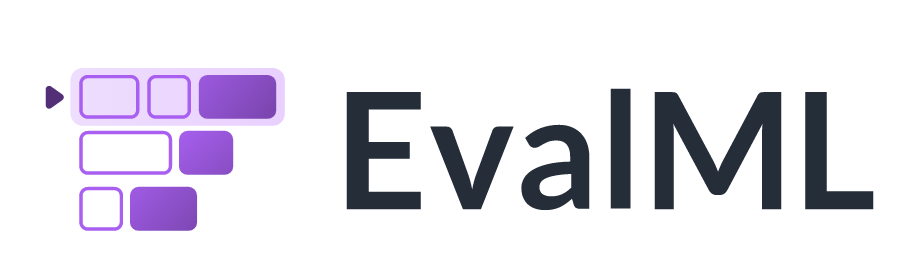

### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.

### Installing Eval ML

In [ ]:
!pip install evalml

### We will use the same train and test dataset for this

In [ ]:
import evalml

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

In [ ]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='regression')

**Running the Auto ML to select best Algorithm**

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='regression')
automl.search()

In [ ]:
automl.rankings

In [ ]:
automl.best_pipeline

In [ ]:
best_pipeline=automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


In [ ]:
best_pipeline.score(X_test, y_test, objectives=["R2"])

### Making a model based on R2 objective

In [ ]:
automl_r2 = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='regression',
                          objective='R2',
                          
                          max_batches=1,
                          optimize_thresholds=True)

automl_r2.search()

In [ ]:
automl_r2.rankings

In [ ]:
automl_r2.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

In [ ]:
best_pipeline_r2 = automl_r2.best_pipeline


In [ ]:
best_pipeline_r2.score(X_test, Y_test,  objectives=["R2"])

#### Save the model

In [ ]:
best_pipeline.save("model.pkl")

#### Load our model

In [ ]:

final_model=automl.load('model.pkl')

#### Final Predictions

In [ ]:
final_model.predict(X_test)